In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from sklearn.model_selection import KFold


from common_functions import foo
mpl.style.use('classic')

%load_ext autoreload
%autoreload 2
results = "results"

In [2]:
from common_functions import latexify, format_axes, tableau20blind
latexify(14, 8)

In [3]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 2,
    'legend.fontsize': 14 + 4,
    'legend.framealpha': .6,
    'axes.titlesize': 14 + 4,
    "axes.labelsize": 14 + 4,
    'xtick.labelsize': 14 + 4,
    'ytick.labelsize': 16 + 4,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 2,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

In [4]:
datafile = '../data/beijinga_scaled.csv'

In [5]:
datadf = pd.read_csv(datafile, index_col=0)

In [6]:
data_df = datadf.groupby("station_id").get_group(1001)

In [7]:
data_df.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [8]:
y = data_df["PM2.5"].values
x = data_df["ts"] * 365

In [9]:
y

array([156.25      ,  24.83333333,  72.58333333,  30.04347826,
        23.08333333,  67.75      ,  67.90909091,  79.54166667,
        61.875     ,  28.66666667,  33.75      ,  60.375     ,
        26.91666667,  89.20833333,  66.08333333,  70.83333333,
        90.66666667, 119.70833333,  90.47826087, 123.25      ,
       157.91666667,  89.625     ,  80.375     ,  90.5       ,
        27.08695652,  31.20833333,  30.5       ,  34.79166667,
        81.25      , 106.        ,  36.        ,  30.36363636,
        34.17647059,  48.1875    ,  56.68421053,  53.875     ,
         7.83333333,  18.54166667,  22.875     ,  52.70833333,
        48.83333333,  25.31578947,  41.31578947,  34.4375    ,
        89.53333333,  91.58333333,  70.79166667,  42.54166667,
       101.41666667,  36.79166667,  72.625     ,  20.29166667,
        21.75      ,  40.70833333,  92.79166667,  86.54166667,
        22.625     ,  16.33333333,  37.79166667,  54.41666667,
        21.        , 179.61538462, 152.86666667, 116.08

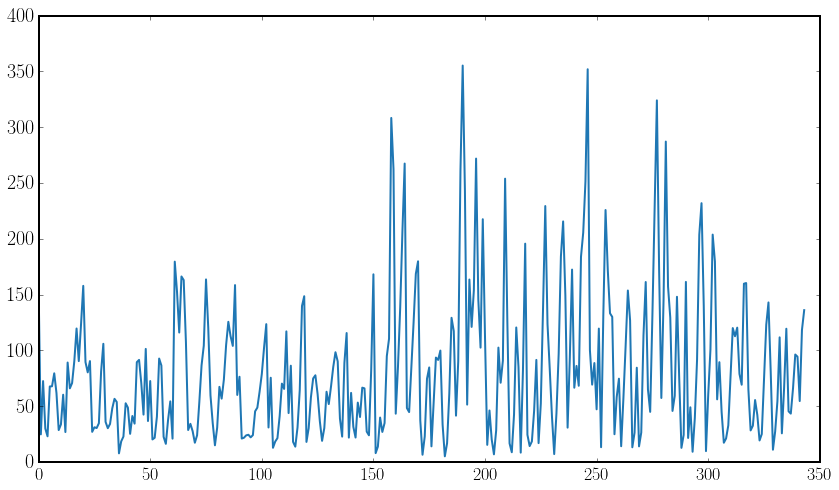

In [10]:
plt.plot(y)

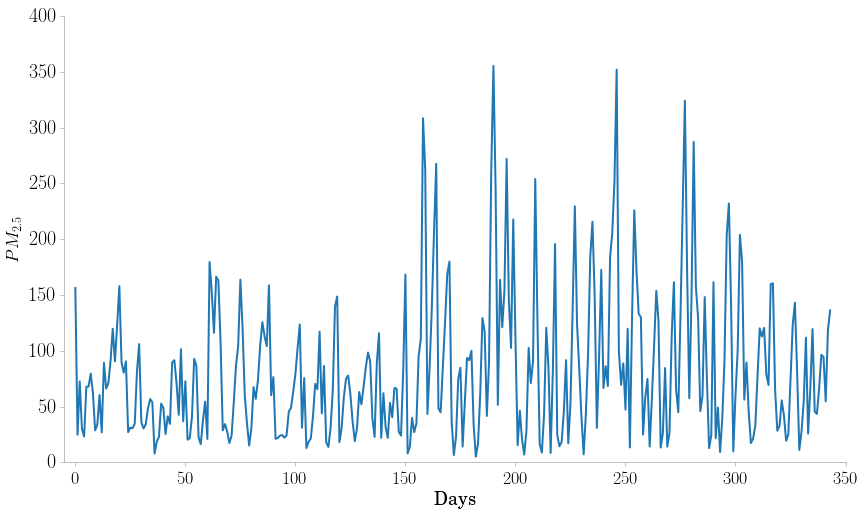

In [19]:
plt.plot(y)#, label="Station ID 1001")
plt.xlabel("Days")
plt.ylabel(r"$PM_{2.5}$")
# plt.legend()
plt.xlim(-5)
format_axes(plt.gca())
plt.savefig("./plts/nonsmooth.pdf")

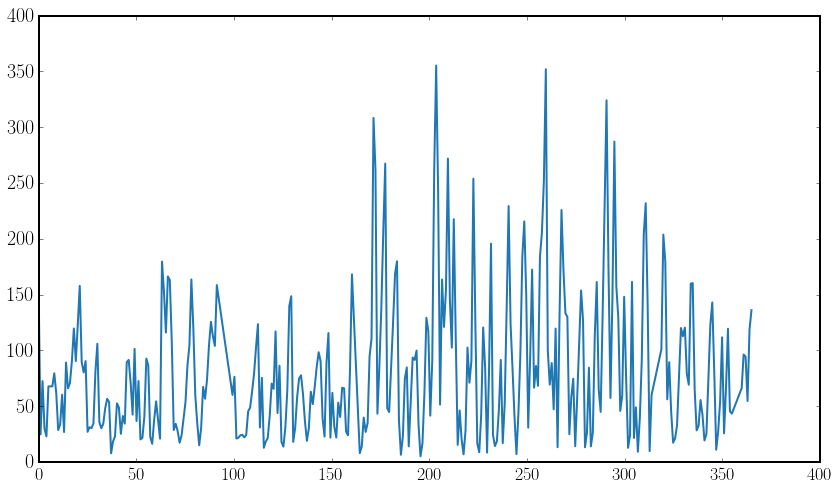

In [20]:
plt.plot(x, y)